C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


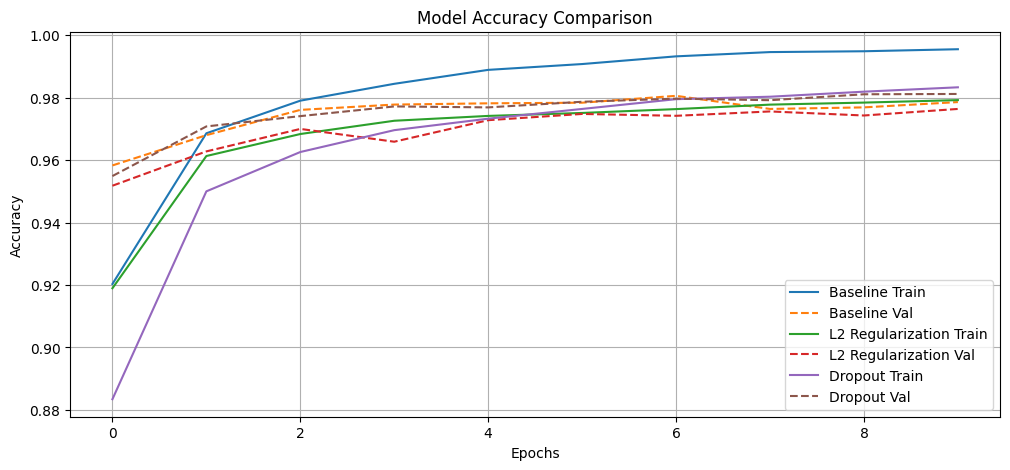

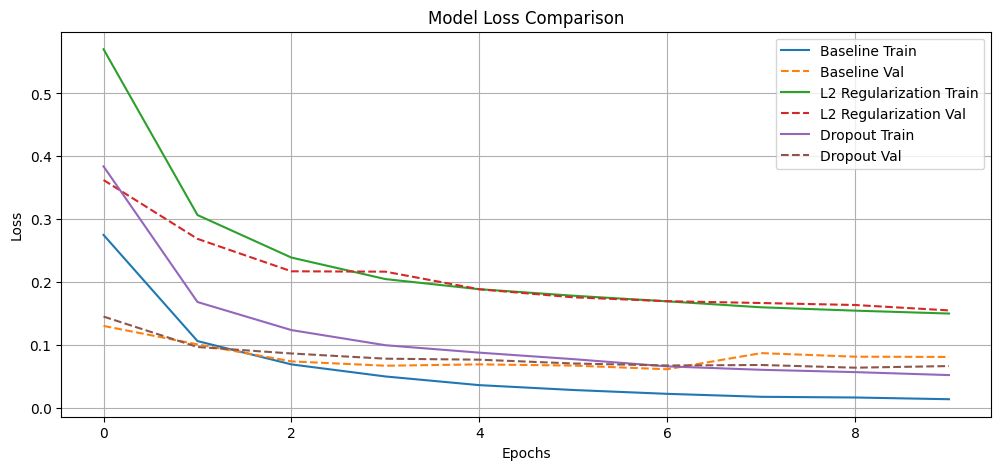

Final Test Accuracy:
Baseline: 0.9786
L2 Regularization: 0.9764
Dropout: 0.9812


In [1]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize images
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten images (28x28 → 784)
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# ================================
# 1️⃣ Baseline Model (No Regularization)
# ================================
baseline_model = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

baseline_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

baseline_history = baseline_model.fit(x_train, y_train,
                                      validation_data=(x_test, y_test),
                                      epochs=10, batch_size=128, verbose=0)

# ================================
# 2️⃣ L2 Regularization
# ================================
l2_model = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,),
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(128, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(10, activation='softmax')
])

l2_model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

l2_history = l2_model.fit(x_train, y_train,
                          validation_data=(x_test, y_test),
                          epochs=10, batch_size=128, verbose=0)

# ================================
# 3️⃣ Dropout Regularization
# ================================
dropout_model = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

dropout_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

dropout_history = dropout_model.fit(x_train, y_train,
                                    validation_data=(x_test, y_test),
                                    epochs=10, batch_size=128, verbose=0)

# ================================
# 📊 Visualization
# ================================

def plot_metrics(histories, metric='accuracy'):
    plt.figure(figsize=(12, 5))
    for name, history in histories.items():
        plt.plot(history.history[metric], label=f'{name} Train')
        plt.plot(history.history[f'val_{metric}'], '--', label=f'{name} Val')
    plt.title(f'Model {metric.capitalize()} Comparison')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot Accuracy
plot_metrics({
    'Baseline': baseline_history,
    'L2 Regularization': l2_history,
    'Dropout': dropout_history
}, 'accuracy')

# Plot Loss
plot_metrics({
    'Baseline': baseline_history,
    'L2 Regularization': l2_history,
    'Dropout': dropout_history
}, 'loss')

# ================================
# 🧾 Evaluate final test performance
# ================================
print("Final Test Accuracy:")
print(f"Baseline: {baseline_model.evaluate(x_test, y_test, verbose=0)[1]:.4f}")
print(f"L2 Regularization: {l2_model.evaluate(x_test, y_test, verbose=0)[1]:.4f}")
print(f"Dropout: {dropout_model.evaluate(x_test, y_test, verbose=0)[1]:.4f}")